In [78]:
import numpy as np
from math import *
import random 
import matplotlib.pyplot as plt

In [79]:
#Constantes

T = 250
tau = 5*1e3
beta = 0.75
gamma = 0.01
phi0 = pi/8
T_simul = 500*1e3
delta_t = 10
theta = 50


In [80]:
def f(x_present,x_past,u_t):
    return(1/T*(-x_present + beta*sin(x_past + gamma*u_t + phi0)**2))

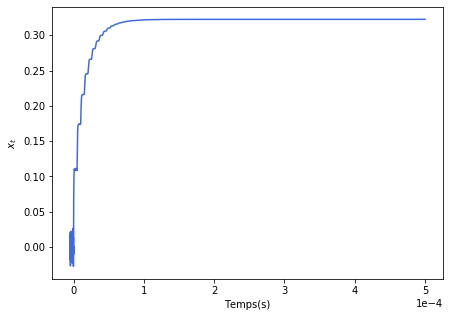

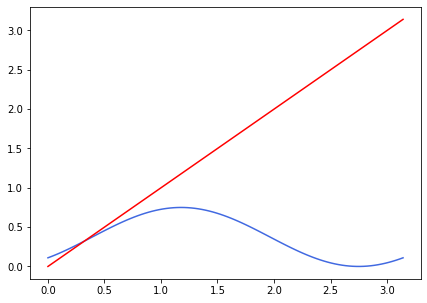

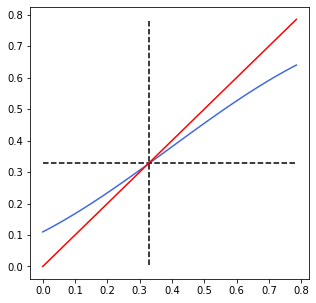

In [81]:
#Question 1

#Initialisation

N = int(T_simul//delta_t)
N_end_init = int(tau//delta_t)+3
time_sample = [0]*(N+N_end_init)

for i in range(N_end_init):
    time_sample[i] = np.random.normal(0,1e-2)

    
for j in range(N_end_init,len(time_sample)-1):
    x_t = time_sample[j]
    x_t_1 = time_sample[j-1]
    x_t_2 = time_sample[j-2]
    x_t_3 = time_sample[j-3]
    x_tau = time_sample[j - int(tau//delta_t)]
    x_tau_1 = time_sample[j - int(tau//delta_t) - 1]
    x_tau_2 = time_sample[j - int(tau//delta_t) - 2]
    x_tau_3 = time_sample[j - int(tau//delta_t) - 3]
    x_tau_plus_1 = time_sample[j - int(tau//delta_t) + 1]
    x_p = x_t + delta_t/24*(55*f(x_t,x_tau,0) - 59*f(x_t_1,x_tau_1,0) + 37*f(x_t_2,x_tau_2,0) - 9*f(x_t_3,x_tau_3,0))
    x_c = x_t + delta_t/24*(9*f(x_p,x_tau_plus_1,0) + 19*f(x_t,x_tau,0) - 5*f(x_t_1,x_tau_1,0) + f(x_t_2,x_tau_2,0))
    time_sample[j+1] = x_c

times_plot = np.linspace(-503*10e-9,-503*10e-9+len(time_sample)*10e-9,len(time_sample))
plt.figure(figsize=(7,5))
plt.plot(times_plot,time_sample, color='royalblue')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.ylabel("$x_t$")
plt.show()

#Point fixe 

def g(x):
    return(beta*sin(x+phi0)**2)

X_y = np.linspace(0,pi,100)
plt.figure(figsize=(7,5))
plt.plot(X_y,[g(value) for value in X_y],color='royalblue')
plt.plot(X_y,X_y,color='red')
X_y = np.linspace(0,pi/4,100)
plt.figure(figsize=(5,5))
plt.plot(X_y,[g(value) for value in X_y],color='royalblue')
plt.plot(X_y,[0.33 for value in X_y],'--',color='black')
plt.axvline(x=0.33, ymin=0.05, ymax=0.95, color='black', linestyle='--')
plt.plot(X_y,X_y,color='red')

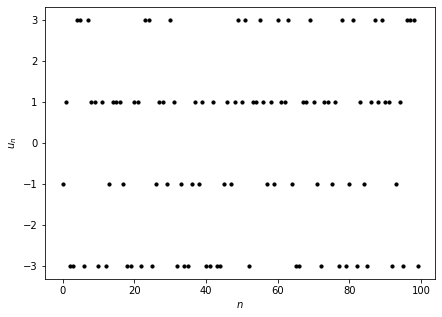

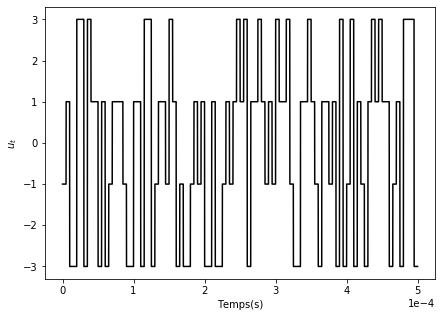

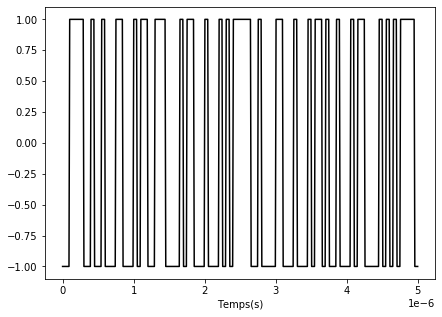

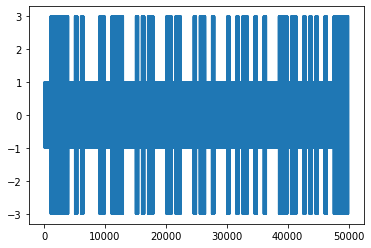

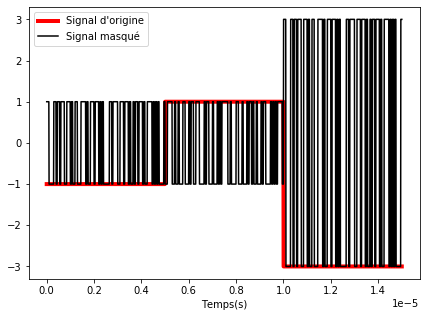

In [82]:
#Question 2

#Création de la matrice des symboles

N_symb = int(T_simul//tau) #Nombre de symboles
M_symb = [0]*N_symb #Matrices des symboles 
symb_values = [-3,-1,1,3]
for i in range(N_symb):
    M_symb[i] = random.choice(symb_values)
    
plt.figure(figsize=(7,5))
plt.scatter([i for i in range(N_symb)], M_symb, color='black', s=10)
plt.xlabel("$n$")
plt.ylabel("$u_n$")
plt.show()

#Passage du discret au continue 

M_symb_cont = [0]*N
for i in range(N_symb):
    t=0
    while t < int(tau/delta_t):
        M_symb_cont[t+i*int(tau/delta_t)] = M_symb[i]
        t+=1

times_plot = np.linspace(0,500e-6,len(M_symb_cont))
plt.figure(figsize=(7,5))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(times_plot,M_symb_cont,color='black')
plt.ylabel("$u_t$")
plt.xlabel("Temps(s)")
plt.show()

#Masque

N_mask = int(tau//theta)
mask_values = [-1,1]
mask_period = [0]*N_mask*int(theta/delta_t)

for i in range(N_mask):
    t=0
    value = random.choice(mask_values)
    while t<int(theta//delta_t):
        mask_period[t+i*int(theta//delta_t)] = value
        t+=1
mask_total = mask_period*int(T_simul//tau)

plt.figure(figsize=(7,5))
times_plot_mask = np.linspace(0,5e-6,len(mask_period))
plt.plot(times_plot_mask,mask_period,color='black')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.show()

#Masquage

M_symb_mask = [x*y for x,y in zip(M_symb_cont,mask_total)]

plt.figure()
plt.plot(M_symb_mask)
plt.show()

#Tracé sur 3 périodes de masque

Y1 = mask_total[0:1500]
Y2 = M_symb_cont[0:1500]
Y3 = M_symb_mask[0:1500]

times_plot = np.linspace(0,3*5e-6,len(Y3))
plt.figure(figsize=(7,5))
#plt.plot(Y1, color='yellow')
plt.plot(times_plot,Y2, color='red', linewidth='4',label="Signal d'origine")
plt.plot(times_plot, Y3, color='black', label='Signal masqué')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.legend()
plt.show()

SNR : 12
Puissance bruit : 0.3154786722400967
Erreur moyenne : 0.6751564664107683


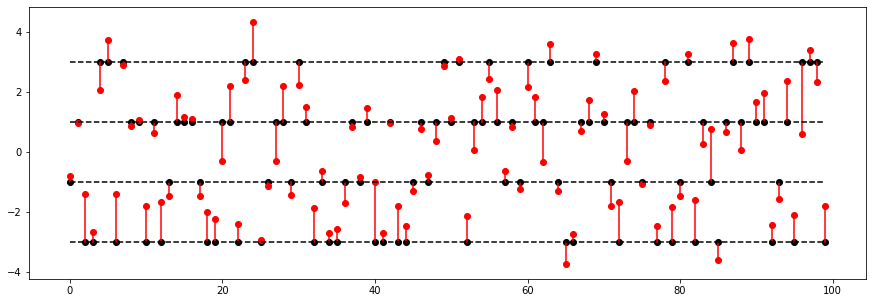

SNR : 16
Puissance bruit : 0.12559432157547898
Erreur moyenne : 0.5899213508380068


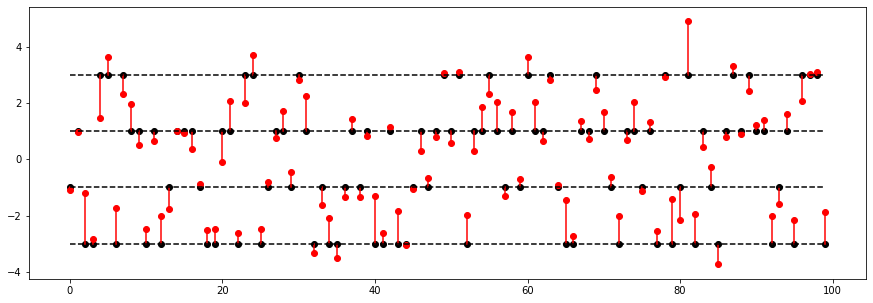

SNR : 20
Puissance bruit : 0.05
Erreur moyenne : 0.49574192791702243


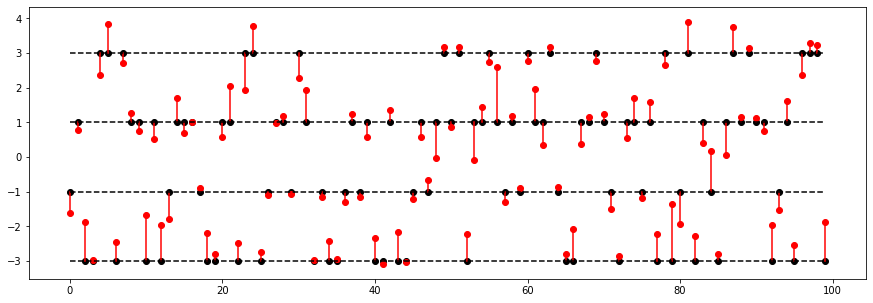

SNR : 24
Puissance bruit : 0.019905358527674867
Erreur moyenne : 0.5356690663377145


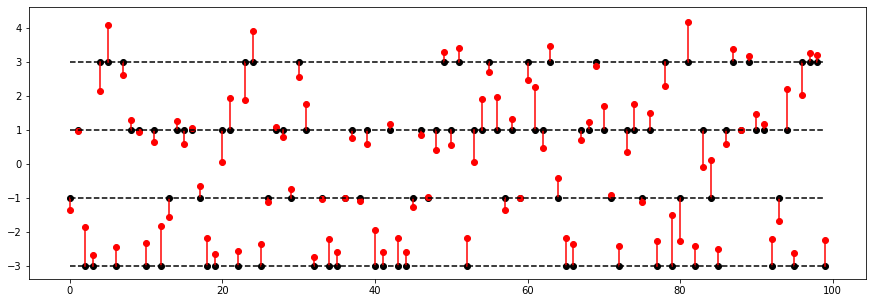

SNR : 28
Puissance bruit : 0.00792446596230557
Erreur moyenne : 0.5226276581970599


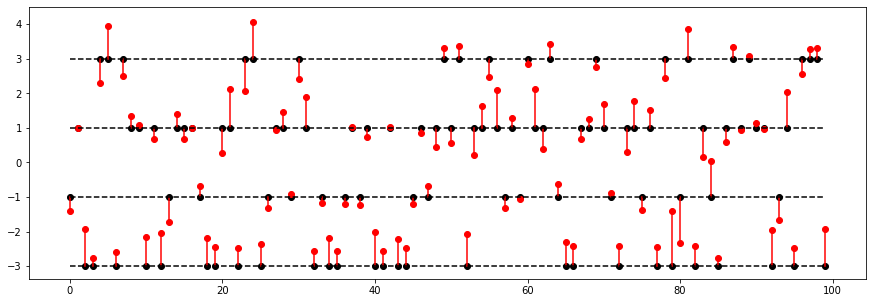

SNR : 32
Puissance bruit : 0.003154786722400965
Erreur moyenne : 0.5146861616323642


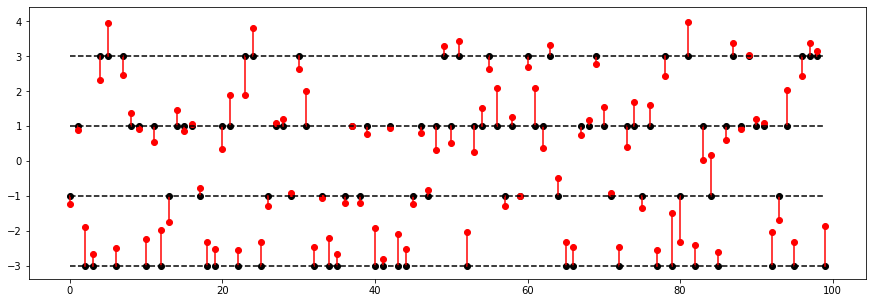

Text(0, 0.5, 'Erreur moyenne')

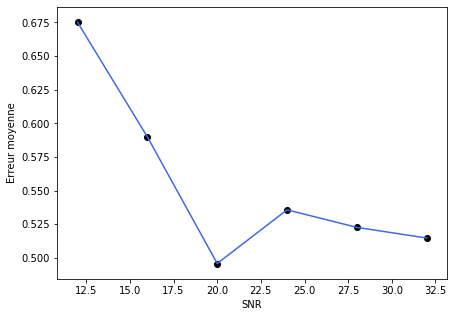

In [83]:
#Question 3

#Simulation de la distorsion dans le canal 

#Calcul de la matrice des qn à partir des symboles

#On initialise en rajoutant 7 premiers points nuls et deux derniers également nuls

M_symb_zeros = [0]*(7+N_symb+2)
for i in range(7):
    M_symb_zeros[i] = 0
for i in range(7,7+N_symb):
    M_symb_zeros[i] = M_symb[i-7]
M_symb_zeros[7+N_symb] = 0
M_symb_zeros[7+N_symb+1] = 0

M_qn = [0]*(N_symb)

for i in range(0,N_symb):
    M_qn[i] = (0.08*M_symb_zeros[7+i+2] - 0.12*M_symb_zeros[7+i+1] + M_symb_zeros[7+i] + 0.18*M_symb_zeros[7+i-1] - 0.1*M_symb_zeros[7+i-2] + 0.091*M_symb_zeros[7+i-3]
    - 0.05*M_symb_zeros[7+i-4] + 0.04*M_symb_zeros[7+i-5] + 0.03*M_symb_zeros[7+i-6] + 0.01*M_symb_zeros[7+i-7])
    
#Calcul de la matrice des un

#Calcul de la matrice de bruit

SNRS = [12,16,20,24,28,32]
AES = []

for SNR in SNRS:
    mean = 0
    P_moyenne_signal = (1**2 + 3**2)/2
    P_noise = P_moyenne_signal/(10**(SNR/10))

    std = P_noise**(1/2)
    noise = np.random.normal(mean, std, size=N_symb)

    M_un = [0]*N_symb
    for i in range(N_symb):
        M_un[i] = M_qn[i] + 0.036*M_qn[i]**2 - 0.011*M_qn[i]**3 + noise[i]
        
    #Statistiques
    
    diff = [abs(x-y) for (x,y) in zip(M_un,M_symb)]
    
    AE = np.mean(diff)
    AES.append(AE)
    
    print("SNR :",SNR)
    print("Puissance bruit :", P_noise)
    print("Erreur moyenne :", AE)

    #Tracé
    
    X_scatter = [i for i in range(0,len(M_symb))]
    plt.figure(figsize=(15,5))
    plt.scatter(X_scatter,M_symb, color='black')
    plt.scatter(X_scatter,M_un, color='red')
    for i in range(len(M_symb)):
        x = [i, i]
        y = [M_symb[i], M_un[i]]
        plt.plot(x,y,color='red')

    plt.plot(X_scatter,[-3 for value in X_scatter],'--', color='black')
    plt.plot(X_scatter,[-1 for value in X_scatter],'--', color='black')
    plt.plot(X_scatter,[1 for value in X_scatter],'--', color='black')
    plt.plot(X_scatter,[3 for value in X_scatter],'--', color='black')
    
    plt.show()
    
plt.figure(figsize=(7,5))
plt.plot(SNRS, AES, color='royalblue')
plt.scatter(SNRS, AES, color='black')
plt.xlabel('SNR')
plt.ylabel('Erreur moyenne')

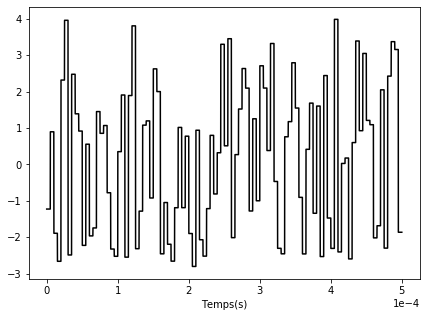

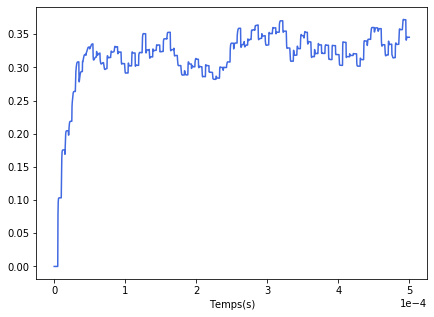

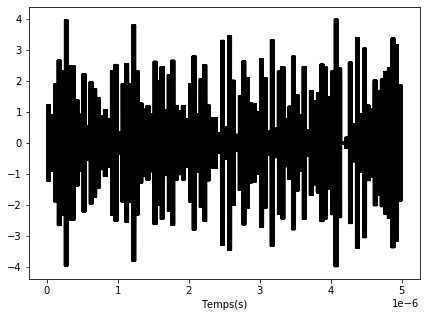

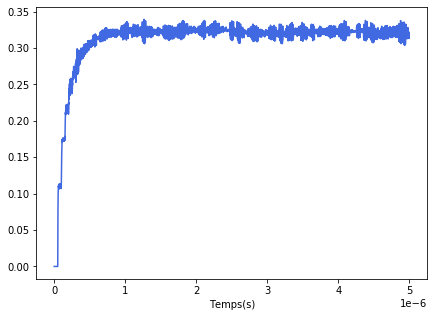

In [84]:
#Question 3

#Passage du discret au continue pour les un :

M_un_cont = [0]*N
for i in range(len(M_un)):
    t=0
    while t < int(tau/delta_t):
        M_un_cont[t+i*int(tau/delta_t)] = M_un[i]
        t+=1

time_plot = np.linspace(0,500e-6,len(M_un_cont))
plt.figure(figsize=(7,5))
plt.plot(time_plot,M_un_cont,color='black')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.show()

#Réponse du système avec pour entrée : les un non-masqués

time_sample = [0]*(N+N_end_init)

for i in range(N_end_init):
    time_sample[i] = 0
    
for j in range(N_end_init,len(time_sample)-1):
    k = j - N_end_init
    x_t = time_sample[j]
    x_t_1 = time_sample[j-1]
    x_t_2 = time_sample[j-2]
    x_t_3 = time_sample[j-3]
    x_tau = time_sample[j - int(tau//delta_t)]
    x_tau_1 = time_sample[j - int(tau//delta_t) - 1]
    x_tau_2 = time_sample[j - int(tau//delta_t) - 2]
    x_tau_3 = time_sample[j - int(tau//delta_t) - 3]
    x_tau_plus_1 = time_sample[j - int(tau//delta_t) + 1]
    x_p = x_t + delta_t/24*(55*f(x_t,x_tau,M_un_cont[k]) - 59*f(x_t_1,x_tau_1,M_un_cont[k]) + 37*f(x_t_2,x_tau_2,M_un_cont[k]) - 9*f(x_t_3,x_tau_3,M_un_cont[k]))
    x_c = x_t + delta_t/24*(9*f(x_p,x_tau_plus_1,M_un_cont[k]) + 19*f(x_t,x_tau,M_un_cont[k]) - 5*f(x_t_1,x_tau_1,M_un_cont[k]) + f(x_t_2,x_tau_2,M_un_cont[k]))
    time_sample[j+1] = x_c 

time_plot = np.linspace(0,500e-6,len(time_sample))
plt.figure(figsize=(7,5))
plt.plot(time_plot,time_sample,color='royalblue')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.show()

#Réponse du système avec pour entrée : les un masqué

M_un_mask = [x*y for x,y in zip(M_un_cont,mask_total)]

time_plot = np.linspace(0,5e-6,len(M_un_mask))
plt.figure(figsize=(7,5))
plt.plot(time_plot, M_un_mask, color='black')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.show()

time_sample = [0]*(N+N_end_init)

for i in range(N_end_init):
    time_sample[i] = 0
    
for j in range(N_end_init,len(time_sample)-1):
    k = j - N_end_init
    x_t = time_sample[j]
    x_t_1 = time_sample[j-1]
    x_t_2 = time_sample[j-2]
    x_t_3 = time_sample[j-3]
    x_tau = time_sample[j - int(tau//delta_t)]
    x_tau_1 = time_sample[j - int(tau//delta_t) - 1]
    x_tau_2 = time_sample[j - int(tau//delta_t) - 2]
    x_tau_3 = time_sample[j - int(tau//delta_t) - 3]
    x_tau_plus_1 = time_sample[j - int(tau//delta_t) + 1]
    x_p = x_t + delta_t/24*(55*f(x_t,x_tau,M_un_mask[k]) - 59*f(x_t_1,x_tau_1,M_un_mask[k]) + 37*f(x_t_2,x_tau_2,M_un_mask[k]) - 9*f(x_t_3,x_tau_3,M_un_mask[k]))
    x_c = x_t + delta_t/24*(9*f(x_p,x_tau_plus_1,M_un_mask[k]) + 19*f(x_t,x_tau,M_un_mask[k]) - 5*f(x_t_1,x_tau_1,M_un_mask[k]) + f(x_t_2,x_tau_2,M_un_mask[k]))
    time_sample[j+1] = x_c 

time_plot = np.linspace(0,5e-6,len(time_sample))
plt.figure(figsize=(7,5))
plt.plot(time_plot, time_sample, color='royalblue')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Temps(s)")
plt.show()

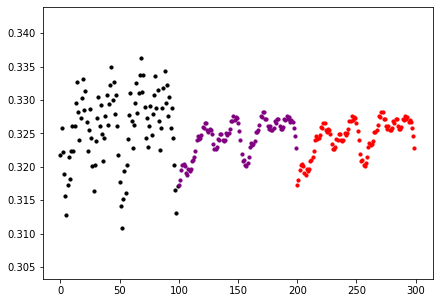

[1, 3, 1, 3, -3, 1, 1, 3, 1, -1, 1, -1, 3, 1, 1, 3, -1, -3, -3, 1, 1, 3, 1, -1, -3, 1, 1, -1, 1, -3, 3, -3, -1, 3, -3, 1, -1, -3, 1, 3, 1, 3, 1, 1, -3, -1, 1, -3, 3, 3]
[1.0, 3.000000001396984, 1.0000000004656613, 3.000000001396984, -2.999999998137355, 1.0000000027939677, 0.9999999990686774, 3.000000001862645, 1.0000000018626451, -0.9999999981373549, 1.0000000013969839, -1.0, 3.0000000023283064, 1.0000000009313226, 1.0000000009313226, 3.0000000027939677, -0.9999999976716936, -2.9999999972060323, -2.9999999972060323, 1.0000000009313226, 1.0, 2.999999998603016, 0.9999999995343387, -0.9999999981373549, -2.9999999995343387, 0.9999999990686774, 1.0000000027939677, -0.9999999972060323, 1.0000000004656613, -3.0, 3.000000001396984, -2.9999999990686774, -0.9999999972060323, 2.9999999939464033, -2.999999991618097, 1.0000000023283064, -1.0000000037252903, -3.0000000004656613, 0.9999999962747097, 2.9999999972060323, 0.9999999920837581, 2.9999999972060323, 1.0000000125728548, 0.9999999939464033, -2

In [85]:
#Question 4

#Création des vecteurs d'états relatif à toutes les valeurs d'entrée

state_vectors = []
for i in range(0,N_symb):
    state_vector = []
    for j in range(1,int(tau//theta)+1):
        k = int(tau//theta)-j
        state_vector.append(time_sample[N_end_init + i*int(tau//delta_t) - k*int(theta//delta_t)])
    state_vectors.append(state_vector)

#Tracé test

#T_plot = [j for j in range(int(tau//delta_t))]
#T_plot2 = [j*50e-9 for j in range(0,int(tau//delta_t),int(theta//delta_t))]

plt.figure(figsize=(7,5))
taille = len(state_vectors[0])
plt.scatter([j for j in range(len(state_vectors[0]))],state_vectors[20], color='black', s=10)
plt.scatter([j+taille for j in range(len(state_vectors[0]))],state_vectors[21], color='purple', s=10)
plt.scatter([j+2*taille for j in range(len(state_vectors[0]))],state_vectors[21], color='red', s=10)
#plt.plot(T_plot,time_sample[N_end_init+9*int(tau//delta_t)+1:N_end_init+10*int(tau//delta_t)+1],color='red')
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

#Vecteur des poids

W = [0.77955935, 0.06939889, 0.42671525, 0.09174105, 0.06198725, 0.99285037,
 0.91486277, 0.72607634, 0.78351819, 0.98589692, 0.0727355,  0.11730563,
 0.46435749, 0.22434553, 0.24454029, 0.42276255, 0.18359079, 0.67081471,
 0.78370239, 0.97389252, 0.60998309, 0.38616068, 0.53638782, 0.18420674,
 0.05893655, 0.15938777, 0.6596277,  0.19785003, 0.11773536, 0.4538369,
 0.40400219, 0.26197085, 0.76264996, 0.84787299, 0.11268997, 0.76543545,
 0.11565637, 0.78043803, 0.60841125, 0.01524089, 0.99170274, 0.39955149,
 0.29177549, 0.96051508, 0.281912, 0.72109064, 0.82562075, 0.37966348,
 0.2455517,  0.85791835, 0.95681685, 0.90770596, 0.84055024, 0.81375545,
 0.35769312, 0.40112994, 0.93102323, 0.2848999,  0.43740451, 0.98158849,
 0.22616913, 0.77362202, 0.68708149, 0.16788883, 0.24091512, 0.81110755,
 0.5866897,  0.91915078, 0.08407484, 0.92707044, 0.23323971, 0.12193135,
 0.98668311, 0.10894975, 0.17549089, 0.72626669, 0.54524604, 0.74745428,
 0.95597959, 0.36766329, 0.87406139, 0.25701232, 0.63106205, 0.49091745,
 0.46198755, 0.46647766, 0.77270943, 0.58743456, 0.1448002, 0.51852381,
 0.49238332, 0.97022621, 0.31876647, 0.39533788, 0.29808292, 0.53037987,
 0.65684998, 0.41466996, 0.09867317, 0.80117776]

#Création du vecteur de sortie 

Y = []
for j in range(N_symb):
    Y.append(np.dot(W,state_vectors[j]))
    
#Training

M_states = np.array(state_vectors)[50:,:]
inv_MP = np.transpose(M_states)@np.linalg.inv(M_states@np.transpose(M_states))
W_optimal = inv_MP@M_symb[48:98]

W_opti_np = np.linalg.lstsq(M_states,M_symb[48:98],rcond=None)[0]

#Création du vecteur de sortie 

Y = []
for j in range(50):
    Y.append(np.dot(W_opti_np,M_states[j]))
print(M_symb[48:98])
print(Y)

[3.8594130086831133, -2.269857790216408, -2.615246657074436]


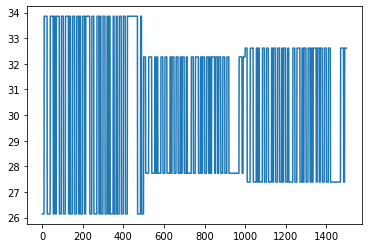

Taille sample :  6550503
Suivi de boucle -  1000000
Suivi de boucle -  2000000
Suivi de boucle -  3000000
Suivi de boucle -  4000000
Suivi de boucle -  5000000
Suivi de boucle -  6000000


In [86]:
#Question 5

#Création de la matrice des symboles

N_symb = 100 + 3000 + 10000 #Nombre de symboles
M_symb = [0]*N_symb #Matrices des symboles 
symb_values = [-3,-1,1,3]
for i in range(N_symb):
    M_symb[i] = random.choice(symb_values)
    
N = N_symb*int(tau//delta_t)
    
#Calcul de la matrice des qn à partir des symboles

#On initialise en rajoutant 7 premiers points nuls et deux derniers également nuls

M_symb_zeros = [0]*(7+N_symb+2)
for i in range(7):
    M_symb_zeros[i] = 0
for i in range(7,7+N_symb):
    M_symb_zeros[i] = M_symb[i-7]
M_symb_zeros[7+N_symb] = 0
M_symb_zeros[7+N_symb+1] = 0

M_qn = [0]*(N_symb)

for i in range(0,N_symb):
    M_qn[i] = (0.08*M_symb_zeros[7+i+2] - 0.12*M_symb_zeros[7+i+1] + M_symb_zeros[7+i] + 0.18*M_symb_zeros[7+i-1] - 0.1*M_symb_zeros[7+i-2] + 0.091*M_symb_zeros[7+i-3]
    - 0.05*M_symb_zeros[7+i-4] + 0.04*M_symb_zeros[7+i-5] + 0.03*M_symb_zeros[7+i-6] + 0.01*M_symb_zeros[7+i-7])

#Calcul de la matrice des un

#Calcul de la matrice de bruit

SNR = 32
P_moyenne_signal = (1**2 + 3**2)/2
P_noise = P_moyenne_signal/(10**(SNR/10))

mean = 0
std = P_noise**(1/2)
noise = np.random.normal(mean, std, size=N_symb)

M_un = [0]*N_symb
for i in range(N_symb):
    M_un[i] = M_qn[i] + 0.036*M_qn[i]**2 - 0.011*M_qn[i]**3 + noise[i]

#Passage du discret au continue pour les un

M_un_cont = [0]*N
for i in range(len(M_un)):
    t=0
    while t < int(tau//delta_t):
        M_un_cont[t+i*int(tau//delta_t)] = M_un[i]
        t+=1
        
#Masquage 

N_mask = int(tau//theta)
mask_values = [-1,1]
mask_period = [0]*N_mask*int(theta/delta_t)

for i in range(N_mask):
    t=0
    value = random.choice(mask_values)
    while t<int(theta//delta_t):
        mask_period[t+i*int(theta//delta_t)] = value
        t+=1
mask_total = mask_period*N_symb

M_un_mask_biased = [x*y+30 for x,y in zip(M_un_cont,mask_total)]

print(M_un[1000:1003])
plt.figure()
plt.plot(M_un_mask_biased[1000*int(tau//delta_t):1003*int(tau//delta_t)])
plt.show()

#Initialisation

N_end_init = int(tau//delta_t)+3
time_sample = [0]*(N+N_end_init)

for i in range(N_end_init):
    time_sample[i] = np.random.normal(0,1e-4)

#Simulation 

print("Taille sample : ", len(time_sample))
for j in range(N_end_init,len(time_sample)-1):
    if j%1000000 == 0: #Suivi de boucle
        print("Suivi de boucle - ",j)
    k = j - N_end_init
    x_t = time_sample[j]
    x_t_1 = time_sample[j-1]
    x_t_2 = time_sample[j-2]
    x_t_3 = time_sample[j-3]
    x_tau = time_sample[j - int(tau//delta_t)]
    x_tau_1 = time_sample[j - int(tau//delta_t) - 1]
    x_tau_2 = time_sample[j - int(tau//delta_t) - 2]
    x_tau_3 = time_sample[j - int(tau//delta_t) - 3]
    x_tau_plus_1 = time_sample[j - int(tau//delta_t) + 1]
    x_p = x_t + delta_t/24*(55*f(x_t,x_tau,M_un_mask_biased[k]) - 59*f(x_t_1,x_tau_1,M_un_mask_biased[k]) + 37*f(x_t_2,x_tau_2,M_un_mask_biased[k]) - 9*f(x_t_3,x_tau_3,M_un_mask_biased[k]))
    x_c = x_t + delta_t/24*(9*f(x_p,x_tau_plus_1,M_un_mask_biased[k]) + 19*f(x_t,x_tau,M_un_mask_biased[k]) - 5*f(x_t_1,x_tau_1,M_un_mask_biased[k]) + f(x_t_2,x_tau_2,M_un_mask_biased[k]))
    time_sample[j+1] = x_c 

In [87]:
#Suite Question 5 

time_sample_init = time_sample[:N_end_init+100*int(tau//delta_t)]
time_sample_training = time_sample[N_end_init+100*int(tau//delta_t):N_end_init+3100*int(tau//delta_t)]
time_sample_testing = time_sample[N_end_init+3100*int(tau//delta_t):N_end_init+13100*int(tau//delta_t)]

#Training

state_vectors = []
for i in range(1,int(len(time_sample_training)//int(tau//delta_t))): #n de 101 à 3099
    state_vector = []
    for j in range(1,int(tau//theta)+1):
        k = int(tau//theta)-j
        state_vector.append(time_sample_training[i*int(tau//delta_t) - k*int(theta//delta_t)])
    state_vectors.append(state_vector)

W_optimal = np.linalg.lstsq(state_vectors, M_symb[99:3098], rcond=None)[0]

#Calcul de la sortie du réservoir une fois entrainé (pour l'échantillon training)

Y_results = state_vectors@W_optimal

#Calcul du taux d'erreur pour le training

Y_results_tresholds = []
for i in range(len(Y_results)):
    if Y_results[i]<-2:
        Y_results_tresholds.append(-3)
    elif -2<=Y_results[i]<0:
        Y_results_tresholds.append(-1)
    elif 0<=Y_results[i]<2:
        Y_results_tresholds.append(1)
    elif Y_results[i]>=2:
        Y_results_tresholds.append(3)

error_training = 0
for i in range(len(Y_results_tresholds)):
    if M_symb[99:3098][i]-Y_results_tresholds[i] != 0:
        error_training+=1
print("Error training :", error_training)    

#Erreur quadratique moyenne (de la différence entre la prédiction et la valeur vraie)

MSE = 0 
for i in range(len(Y_results)):
    MSE += abs(Y_results[i] - M_symb[99:3098][i])**2
MSE = MSE/len(Y_results)
print("MSE training :", MSE)

#Testing 

state_vectors = []
for i in range(1,int(len(time_sample_testing)//int(tau//delta_t))): #n de 3101 à 13099
    state_vector = []
    for j in range(1,int(tau//theta)+1):
        k = int(tau//theta)-j
        state_vector.append(time_sample_testing[i*int(tau//delta_t) - k*int(theta//delta_t)])
    state_vectors.append(state_vector)

Y_results_testing = state_vectors@W_optimal

print()

#Calcul du taux d'erreur pour le testing

Y_results_testing_tresholds = []
for i in range(len(Y_results)):
    if Y_results_testing[i]<-2:
        Y_results_testing_tresholds.append(-3)
    elif -2<=Y_results_testing[i]<0:
        Y_results_testing_tresholds.append(-1)
    elif 0<=Y_results_testing[i]<2:
        Y_results_testing_tresholds.append(1)
    elif Y_results_testing[i]>=2:
        Y_results_testing_tresholds.append(3)

error_testing = 0
for i in range(len(Y_results_testing_tresholds)):
    if M_symb[3099:13098][i]-Y_results_testing_tresholds[i] != 0:
        error_testing+=1
print("Error testing :", error_testing) 

#Erreur quadratique moyenne (de la différence entre la prédiction et la valeur vraie)

MSE = 0 
for i in range(len(Y_results_testing)):
    MSE += abs(Y_results_testing[i] - M_symb[3099:13098][i])**2
MSE = MSE/len(Y_results_testing)
print("MSE training :", MSE)

#Affichage des couples (valeur vraie,prédiction)
print([(x,y) for x,y in zip(M_symb[3099:13098][:100],Y_results_testing_tresholds[:100])])

Error training : 0
MSE training : 0.03386507599519199

Error testing : 0
MSE training : 0.03549985046301348
[(1, 1), (3, 3), (-1, -1), (-3, -3), (3, 3), (1, 1), (-1, -1), (-1, -1), (1, 1), (-3, -3), (-1, -1), (-3, -3), (-1, -1), (-3, -3), (-3, -3), (3, 3), (-3, -3), (1, 1), (-3, -3), (1, 1), (-1, -1), (-3, -3), (1, 1), (-3, -3), (1, 1), (1, 1), (1, 1), (1, 1), (-1, -1), (-3, -3), (-3, -3), (-3, -3), (3, 3), (1, 1), (1, 1), (1, 1), (-1, -1), (1, 1), (-1, -1), (1, 1), (1, 1), (-3, -3), (-3, -3), (1, 1), (-3, -3), (-3, -3), (-3, -3), (1, 1), (-1, -1), (3, 3), (3, 3), (-3, -3), (-1, -1), (-3, -3), (3, 3), (-1, -1), (3, 3), (-1, -1), (-3, -3), (-1, -1), (-3, -3), (-1, -1), (-3, -3), (-1, -1), (-3, -3), (3, 3), (3, 3), (3, 3), (-1, -1), (-1, -1), (-3, -3), (1, 1), (1, 1), (1, 1), (-1, -1), (-3, -3), (-1, -1), (1, 1), (1, 1), (1, 1), (3, 3), (1, 1), (-1, -1), (-1, -1), (-1, -1), (3, 3), (1, 1), (-1, -1), (1, 1), (1, 1), (3, 3), (-1, -1), (-1, -1), (-1, -1), (-1, -1), (-3, -3), (-3, -3), (-3, 